### Librerías

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

from utils.funciones import CategoricalAnalysis

### Datos

In [286]:
df = pd.read_csv('./data/datos_donantes.csv')
df.head()

,name,email,date,is_partner,company,role_company,donation_frecuency,suscription_status,donation_type,amount,method_pay,donation_date
0,Tara Young,tara.young@gmail.com,2017-10-22,1,Nike,CTO,1,1,4,0.00,1,2021-11-14
1,Bobby Acevedo,bobby.acevedo@gmail.com,2019-02-18,0,NaN,NaN,0,0,1,1355.38,3,2022-05-01
2,James Payne,james.payne@gmail.com,2013-03-06,0,NaN,NaN,0,0,1,8132.27,3,2014-10-18
3,Heather Mooney,heather.mooney@gmail.com,2013-06-02,1,Jonhsons,Employee,0,1,2,0.00,2,2018-06-11
4,Joseph Anderson,joseph.anderson@gmail.com,2024-01-21,1,The Oberoi,Employee,1,1,2,0.00,2,2024-01-30


In [287]:
df.head()

,name,email,date,is_partner,company,role_company,donation_frecuency,suscription_status,donation_type,amount,method_pay,donation_date
0,Tara Young,tara.young@gmail.com,2017-10-22,1,Nike,CTO,1,1,4,0.00,1,2021-11-14
1,Bobby Acevedo,bobby.acevedo@gmail.com,2019-02-18,0,NaN,NaN,0,0,1,1355.38,3,2022-05-01
2,James Payne,james.payne@gmail.com,2013-03-06,0,NaN,NaN,0,0,1,8132.27,3,2014-10-18
3,Heather Mooney,heather.mooney@gmail.com,2013-06-02,1,Jonhsons,Employee,0,1,2,0.00,2,2018-06-11
4,Joseph Anderson,joseph.anderson@gmail.com,2024-01-21,1,The Oberoi,Employee,1,1,2,0.00,2,2024-01-30


### Primera exploración

In [288]:
df.shape

(3934, 12)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                3934 non-null   object 
 1   email               3934 non-null   object 
 2   date                3934 non-null   object 
 3   is_partner          3934 non-null   int64  
 4   company             497 non-null    object 
 5   role_company        497 non-null    object 
 6   donation_frecuency  3934 non-null   int64  
 7   suscription_status  3934 non-null   int64  
 8   donation_type       3934 non-null   int64  
 9   amount              3934 non-null   float64
 10  method_pay          3934 non-null   int64  
 11  donation_date       3934 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 368.9+ KB


- Las fechas no poseen su tipo de dato correcto: "date" "donation_date"
- Poseemos nulos: "role_company" "company"


In [290]:
df.describe()

,is_partner,donation_frecuency,suscription_status,donation_type,amount,method_pay
count,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000
mean,0.126335,0.873157,0.936197,1.174631,3005.890974,1.918149
std,0.332268,0.332839,0.244432,0.604885,2954.647326,0.809875
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,451.790000,1.000000
50%,0.000000,1.000000,1.000000,1.000000,1807.170000,2.000000
75%,0.000000,1.000000,1.000000,1.000000,4517.930000,3.000000
max,1.000000,1.000000,1.000000,4.000000,9035.860000,3.000000


- Las escalas son distintas

In [291]:
df.describe(include='object')

,name,email,date,company,role_company,donation_date
count,3934,3934,3934,497,497,3934
unique,994,994,496,16,3,2995
top,Christy Johnson,christy.johnson@gmail.com,2023-10-29,The Oberoi,Employee,2024-02-14
freq,24,24,39,39,175,6


In [292]:
df.isnull().sum()

name                     0
email                    0
date                     0
is_partner               0
company               3437
role_company          3437
donation_frecuency       0
suscription_status       0
donation_type            0
amount                   0
method_pay               0
donation_date            0
dtype: int64

In [293]:
df.duplicated().sum()

0

### Limpieza

In [294]:
def convert_to_rupias(amount):
    return amount * 85  # Suponiendo que 1 euro equivale a 85 rupias

# Aplicar la conversión solo cuando is_partner es igual a 1
df['amount'] = df.apply(lambda row: convert_to_rupias(row['amount']) if row['is_partner'] == 1 else row['amount'], axis=1)

In [295]:
df.fillna('Particular', inplace=True)

In [296]:
df['date'] = pd.to_datetime(df['date'])
df['donation_date'] = pd.to_datetime(df['donation_date'])

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                3934 non-null   object        
 1   email               3934 non-null   object        
 2   date                3934 non-null   datetime64[ns]
 3   is_partner          3934 non-null   int64         
 4   company             3934 non-null   object        
 5   role_company        3934 non-null   object        
 6   donation_frecuency  3934 non-null   int64         
 7   suscription_status  3934 non-null   int64         
 8   donation_type       3934 non-null   int64         
 9   amount              3934 non-null   float64       
 10  method_pay          3934 non-null   int64         
 11  donation_date       3934 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 368.9+ KB


In [298]:
def modificar_method_pay(row):
    if row['donation_type'] in [2, 3, 4]:
        return 0
    else:
        return row['method_pay']

# Aplicar la función a la columna 'method_pay'
df['method_pay'] = df.apply(modificar_method_pay, axis=1)

In [299]:
df['month'] = df['donation_date'].dt.month
df['year'] = df['donation_date'].dt.year
df['day'] = df['donation_date'].dt.day

df = df.drop(df[df['year'] == 2025].index)

In [16]:
df['day'].unique()

array([14,  1, 18, 11, 30,  5, 29, 21, 25,  8,  7, 23, 16, 15, 13, 24,  2,
       12, 27, 19, 17,  4, 10, 26, 28,  3, 20, 22,  9,  6, 31])

### Análisis Exploratorio

#### Análsisi univariante

In [ ]:
cat = CategoricalAnalysis(df)

In [ ]:
cat.plot_top_categories(title='Empresa', column_name= 'company', labely='Empresa', n=5) # La primera son los nulos que ya solucionamos

In [ ]:
cat.plot_top_categories(title='Rol de Empresa', column_name= 'role_company', labely='Rol de Empresa', n=5) 

In [ ]:
cat.plot_distribution(title='Donaciones', column_name='donation_frecuency', alpha=0.8, color='orange', cant_bins=20, rotation=0)

In [ ]:
cat.plot_distribution(title='Tipo de donación', column_name='donation_type', alpha=0.8, color='orange', cant_bins=20, rotation=0)

In [ ]:
cat.plot_distribution(title='Dinero', column_name='amount', alpha=0.8, color='orange', cant_bins=20, rotation=0)

In [ ]:
cat.plot_distribution(title='Método de pago', column_name='method_pay', alpha=0.8, color='orange', cant_bins=20, rotation=0)

*****

### Análisis de fechas

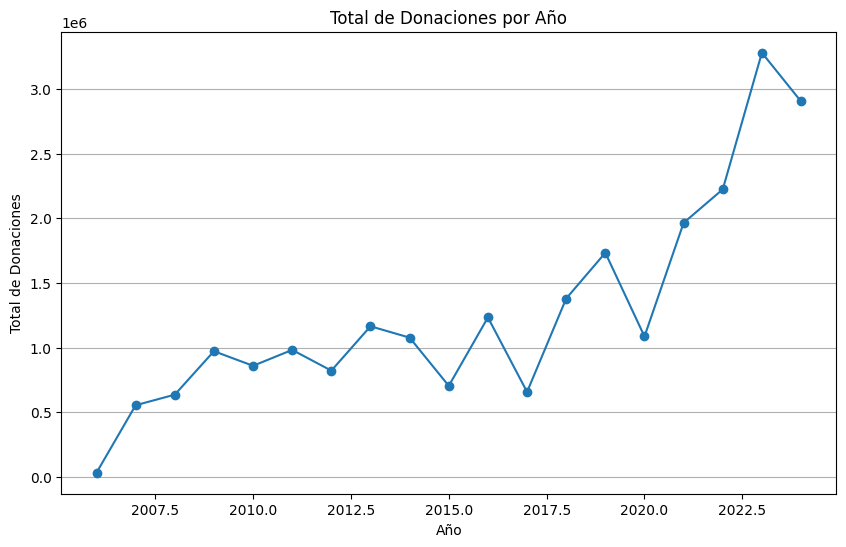

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
amount,33432.68,555159.23,637118.45,972965.81,860213.7,983039.44,822592.37,1165789.54,1077954.25,705224.47,1234197.89,658202.24,1380505.11,1734353.57,1087071.35,1965583.3,2224756.35,3280967.16,2904211.63


In [35]:
# Gráfico de barras de total de donaciones por año
df['year'] = df['donation_date'].dt.year
total_donations_yearly = df.groupby('year')['amount'].sum()
total_donations_yearly.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Total de Donaciones por Año')
plt.xlabel('Año')
plt.ylabel('Total de Donaciones')
plt.grid(axis='y')
plt.show()

df.groupby('year')[['amount']].sum().T

1. **Tendencia de crecimiento:** Se observa un aumento significativo en el total de donaciones a lo largo de los años, comenzando en 2006 con 33,432.68 rupias y alcanzando un máximo en 2024 con 3,280,967.16 rupias.

2. **Variabilidad anual:** A lo largo de los años, se observan fluctuaciones en el total de donaciones, con algunos años mostrando aumentos significativos (por ejemplo, 2007, 2017, 2021) y otros mostrando disminuciones o estabilidad en comparación con el año anterior.

3. **Crecimiento sostenido a partir de 2010:** Después de 2010, se observa un crecimiento sostenido en el total de donaciones año tras año, lo que sugiere un aumento en la participación de donantes o una mayor generosidad por parte de los donantes existentes.

4. **Potencial aumento en la participación de donantes:** El incremento en el total de donaciones puede indicar un aumento en el número de donantes o una mayor participación de los donantes existentes. Esto podría ser resultado de una mayor conciencia sobre la causa, campañas de recaudación de fondos efectivas o eventos de caridad exitosos.

5. **Importancia del año 2024:** El año 2024 destaca con un total de donaciones significativamente mayor en comparación con los años anteriores, lo que podría sugerir eventos o circunstancias especiales que motivaron una mayor generosidad por parte de los donantes.

En resumen, los datos muestran una tendencia general de crecimiento en el total de donaciones a lo largo de los años, con variabilidad anual y un crecimiento sostenido a partir de 2010. Esto podría indicar un aumento en la conciencia sobre la causa, así como una mayor participación y generosidad por parte de los donantes.

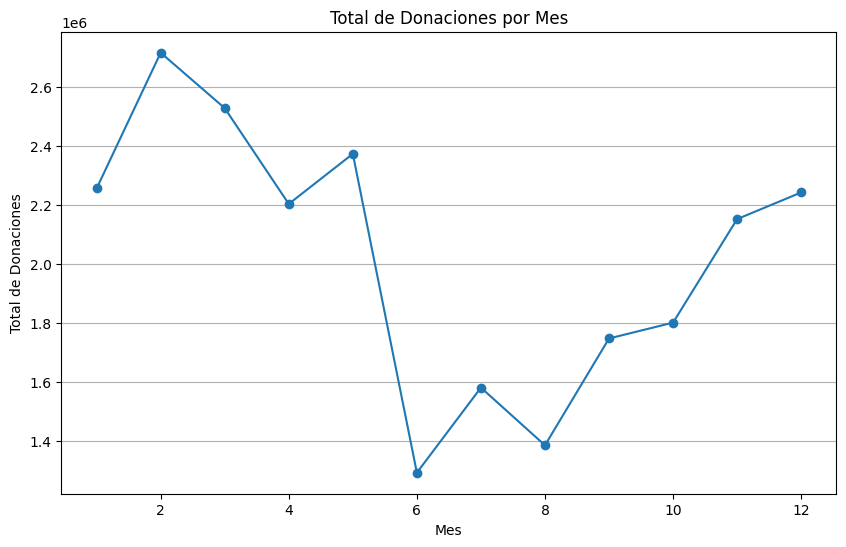

month,1,2,3,4,5,6,7,8,9,10,11,12
amount,2256477.88,2716967.47,2528884.75,2204008.42,2373952.86,1292250.49,1580869.88,1385225.98,1747667.86,1801373.2,2152664.29,2242995.46


In [36]:
# Gráfico de barras de total de donaciones por mes
df['month'] = df['donation_date'].dt.month
total_donations_monthly = df.groupby('month')['amount'].sum()

total_donations_monthly.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Total de Donaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Donaciones')
plt.grid(axis='y')
plt.show()

df.groupby('month')[['amount']].sum().T

1. **Variabilidad mensual:** Se observa cierta variabilidad en el total de donaciones a lo largo de los meses. Por ejemplo, los meses de febrero y noviembre tienen los valores más altos, mientras que los meses de junio y agosto tienen los valores más bajos.

2. **Patrones estacionales:** Los meses de febrero y noviembre sobresalen con los totales de donaciones más altos, lo que sugiere que puede haber eventos o campañas específicas que ocurren durante estos meses que motivan a los donantes a contribuir más.

3. **Meses de verano:** Los meses de junio y agosto muestran los totales de donaciones más bajos. Esto podría atribuirse a factores estacionales, como las vacaciones de verano, cuando las personas pueden estar menos inclinadas a hacer donaciones debido a otras prioridades o compromisos.

En resumen, los datos muestran cierta variabilidad en los totales de donaciones a lo largo de los meses del año, con algunos meses destacando por encima de otros. Esto sugiere la influencia de factores estacionales y eventos específicos en el comportamiento de donación de los contribuyentes.

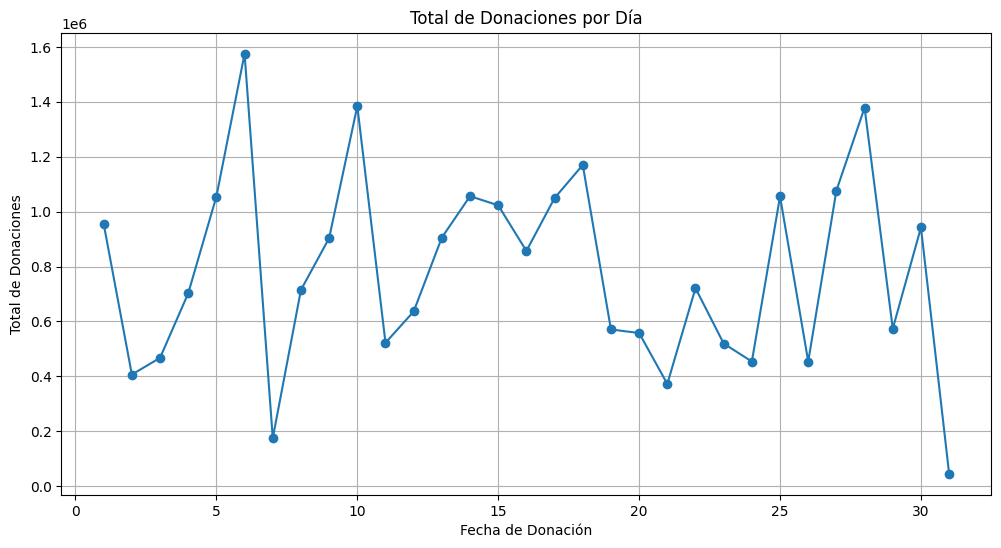

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
amount,955459.51,406517.75,467261.18,702673.37,1055199.81,1575480.7,174731.55,714870.97,903559.54,1384667.76,...,721339.99,519579.19,453896.54,1055690.52,453918.09,1076960.44,1378919.52,573572.96,942328.45,45179.33


In [19]:
# Gráfico de líneas de total de donaciones por día
total_donations_daily = df.groupby('day')['amount'].sum()
total_donations_daily.plot(kind='line', figsize=(12, 6),  marker = 'o')
plt.title('Total de Donaciones por Día')
plt.xlabel('Fecha de Donación')
plt.ylabel('Total de Donaciones')
plt.grid(True)
plt.show()

df.groupby('day')[['amount']].sum().T

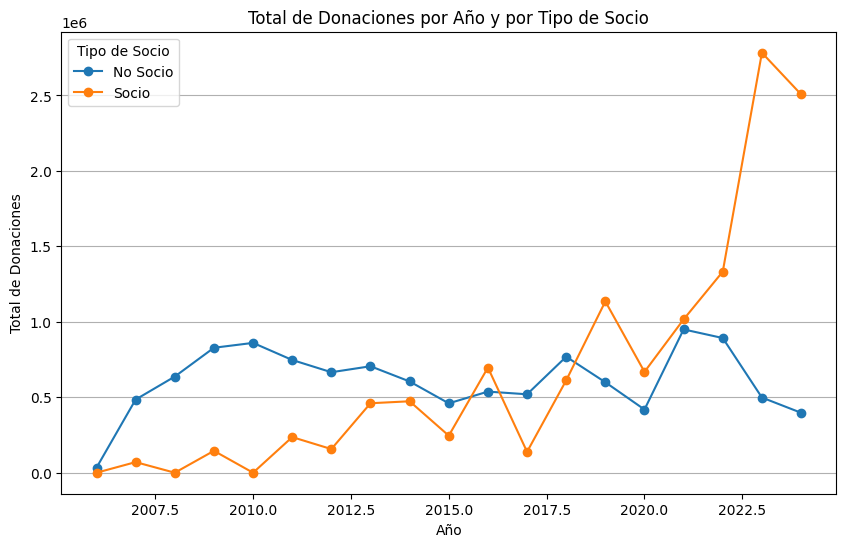

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
is_partner,,,,,,,,,,,,,,,,,,,
0,33432.68,484864.23,637118.45,827955.81,860213.7,746994.44,665852.37,705429.54,604589.25,459744.47,537452.89,519652.24,768590.11,599348.57,418631.35,949578.3,892381.35,498237.16,397306.63
1,0.00,70295.00,0.00,145010.00,0.0,236045.00,156740.00,460360.00,473365.00,245480.00,696745.00,138550.00,611915.00,1135005.00,668440.00,1016005.0,1332375.00,2782730.00,2506905.00


In [33]:
total_donations_by_year_partner = df.pivot_table(index='year', columns='is_partner', values='amount', aggfunc='sum').fillna(0)

# Graficar el total de donaciones por año y por is_partner
total_donations_by_year_partner.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Total de Donaciones por Año y por Tipo de Socio')
plt.xlabel('Año')
plt.ylabel('Total de Donaciones')
plt.grid(axis='y')
plt.legend(title='Tipo de Socio', labels=['No Socio', 'Socio'])
plt.show()

total_donations_by_year_partner.T

Estos datos muestran la distribución de las donaciones según si el donante es un socio (is_partner = 1) o no (is_partner = 0) a lo largo de los años. Aquí algunas observaciones:

1. **Participación de los socios:** Se observa que las donaciones de los socios (is_partner = 1) comienzan en 2007 con un monto de 70,295.00 rupias, lo que indica que los socios comenzaron a contribuir financieramente ese año. A partir de entonces, las donaciones de los socios muestran una tendencia general al alza, con algunos años mostrando aumentos significativos.

2. **Contribuciones de no socios:** Las donaciones de no socios (is_partner = 0) también muestran una tendencia al alza, con algunos años mostrando aumentos significativos, como en 2007 y 2021. Sin embargo, la cantidad total donada por no socios tiende a *ser menor que la de los socios en la mayoría de los años.*

3. **Año más destacado:** El año 2023 destaca por tener la mayor diferencia entre las donaciones de socios y no socios, con una cantidad considerablemente mayor donada por socios en comparación con no socios.

4. **Impacto de la participación de los socios:** Los datos sugieren que la participación de los socios tiene un impacto significativo en el total de donaciones, contribuyendo con cantidades considerables en varios años. Esto podría indicar una mayor fidelidad y compromiso por parte de los socios con la causa o la organización.

En resumen, estos datos proporcionan una visión de cómo la participación de los socios puede influir en el total de donaciones a lo largo de los años, destacando la importancia de mantener y fomentar la participación activa de los socios en las actividades de recaudación de fondos.

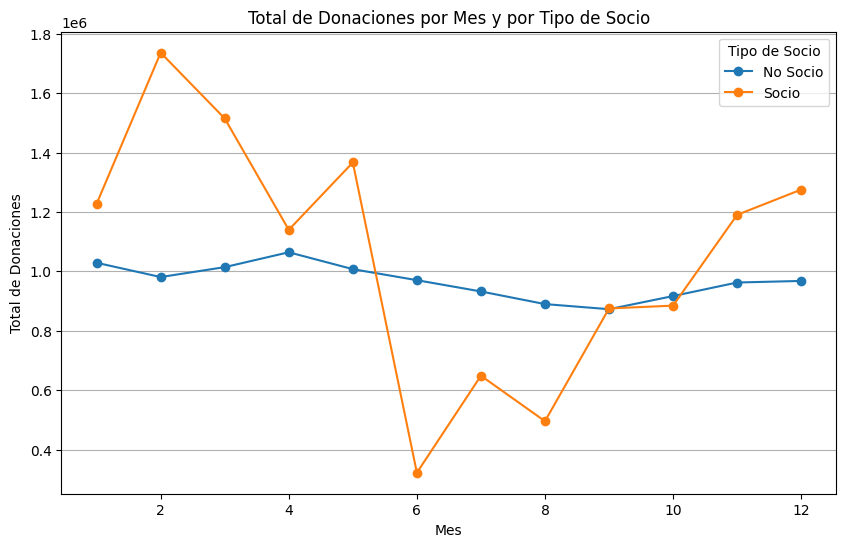

month,1,2,3,4,5,6,7,8,9,10,11,12
is_partner,,,,,,,,,,,,
0,1028822.88,980842.47,1014184.75,1064243.42,1007407.86,970270.49,932319.88,889760.98,872592.86,916778.2,962409.29,967740.46
1,1227655.00,1736125.00,1514700.00,1139765.00,1366545.00,321980.00,648550.00,495465.00,875075.00,884595.0,1190255.00,1275255.00


In [32]:
total_donations_by_month_partner = df.pivot_table(index='month', columns='is_partner', values='amount', aggfunc='sum').fillna(0)

# Graficar el total de donaciones por año y por is_partner
total_donations_by_month_partner.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Total de Donaciones por Mes y por Tipo de Socio')
plt.xlabel('Mes')
plt.ylabel('Total de Donaciones')
plt.grid(axis='y')
plt.legend(title='Tipo de Socio', labels=['No Socio', 'Socio'])
plt.show()

total_donations_by_month_partner.T

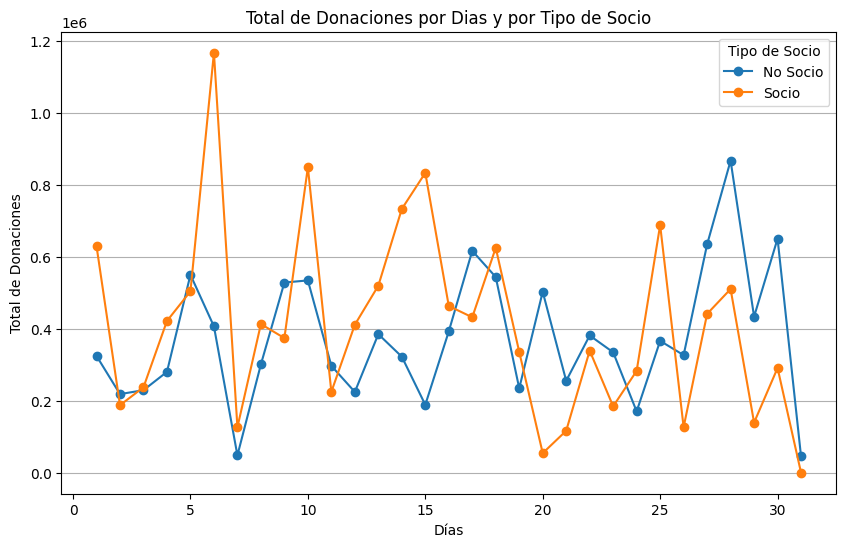

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
is_partner,,,,,,,,,,,,,,,,,,,,,
0,324929.51,218667.75,229601.18,280563.37,550554.81,407155.7,48251.55,301345.97,529049.54,534922.76,...,381764.99,334959.19,170506.54,366765.52,327098.09,635130.44,867984.52,434172.96,651033.45,45179.33
1,630530.00,187850.00,237660.00,422110.00,504645.00,1168325.0,126480.00,413525.00,374510.00,849745.00,...,339575.00,184620.00,283390.00,688925.00,126820.00,441830.00,510935.00,139400.00,291295.00,0.00


In [30]:
total_donations_by_day_partner = df.pivot_table(index='day', columns='is_partner', values='amount', aggfunc='sum').fillna(0)

# Graficar el total de donaciones por año y por is_partner
total_donations_by_day_partner.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Total de Donaciones por Dias y por Tipo de Socio')
plt.xlabel('Días')
plt.ylabel('Total de Donaciones')
plt.grid(axis='y')
plt.legend(title='Tipo de Socio', labels=['No Socio', 'Socio'])
plt.show()

total_donations_by_day_partner.T

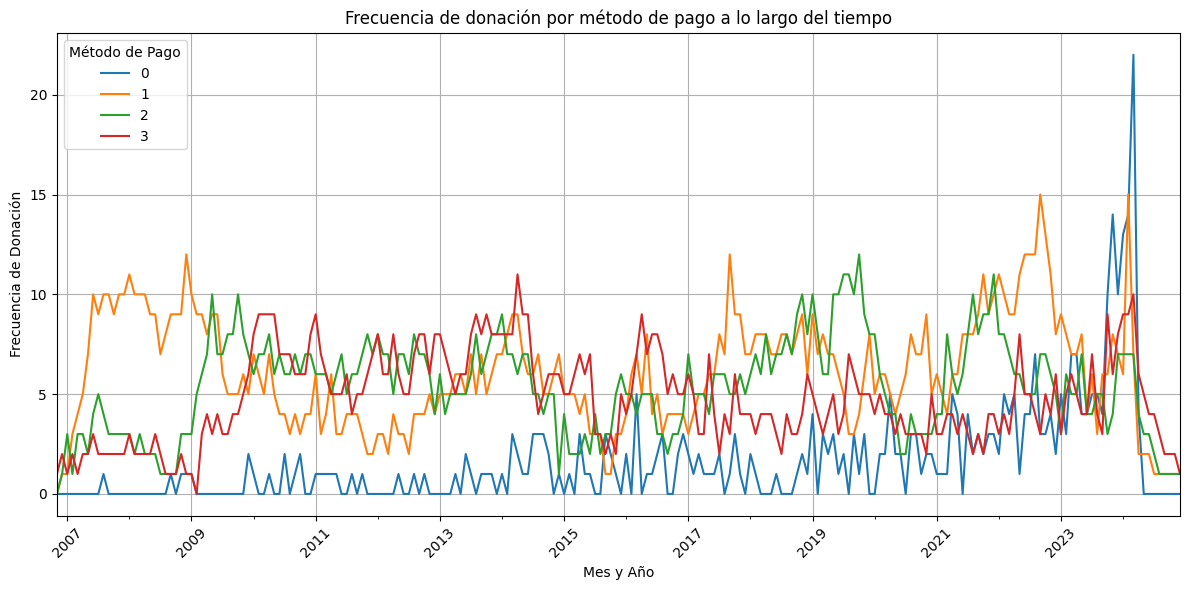

In [39]:
df['month_year'] = df['donation_date'].dt.to_period('M')  # Agrupa por mes y año
grouped_data = df.groupby(['month_year', 'method_pay']).size().unstack(fill_value=0)

# Graficar la frecuencia de donación por método de pago a lo largo del tiempo
grouped_data.plot(kind='line', figsize=(12, 6))
plt.title('Frecuencia de donación por método de pago a lo largo del tiempo')
plt.xlabel('Mes y Año')
plt.ylabel('Frecuencia de Donación')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Método de Pago')
plt.tight_layout()
plt.show()

# Regresión lineal con series temporales

El algoritmo de **regresión lineal** aprende a hacer una suma ponderada de sus características de entrada. Para dos características, tendríamos

```
objetivo = peso_1 * característica_1 + peso_2 * característica_2 + bias
```

Durante el entrenamiento, el algoritmo de regresión aprende los valores de los parámetros "peso_1", "peso_2" y "sesgo" que mejor se ajustan al "objetivo". (Este algoritmo suele denominarse *mínimos cuadrados ordinarios*, ya que elige los valores que minimizan el error cuadrático entre el objetivo y las predicciones). Los pesos también se denominan *coeficientes de regresión* y el `bias` también se denomina *intercepto* porque indica dónde cruza la gráfica de esta función el eje y.

In [103]:
# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima

# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# skforecast
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from sklearn.metrics import mean_absolute_error

c:\Users\Sol\DesafioTripulaciones\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [300]:
df = df[['donation_date', 'amount']]
df = df.sort_values(by='donation_date')
df = df.set_index('donation_date')
df

,amount
donation_date,
2006-11-29,9035.86
2006-12-02,4517.93
2006-12-20,9035.86
2006-12-23,1807.17
2006-12-29,9035.86
...,...
2024-11-23,6325.10
2024-11-30,8132.27
2024-12-16,903.59


In [301]:
df = df.groupby(level=0).sum()

# Rellenar las fechas faltantes
idx = pd.date_range(start='2019-01-01', end='2024-01-01')
df = df.reindex(idx)

# Filtrar por el rango de fechas
df_filtered = df.loc['2019-01-01':'2024-01-01']

In [302]:
df_filtered = df_filtered.fillna(0)
df_filtered

,amount
2019-01-01,4517.93
2019-01-02,0.00
2019-01-03,0.00
2019-01-04,3704.70
2019-01-05,0.00
...,...
2023-12-28,8132.27
2023-12-29,6325.10
2023-12-30,8132.27
2023-12-31,0.00


<Axes: title={'center': 'Amount'}>

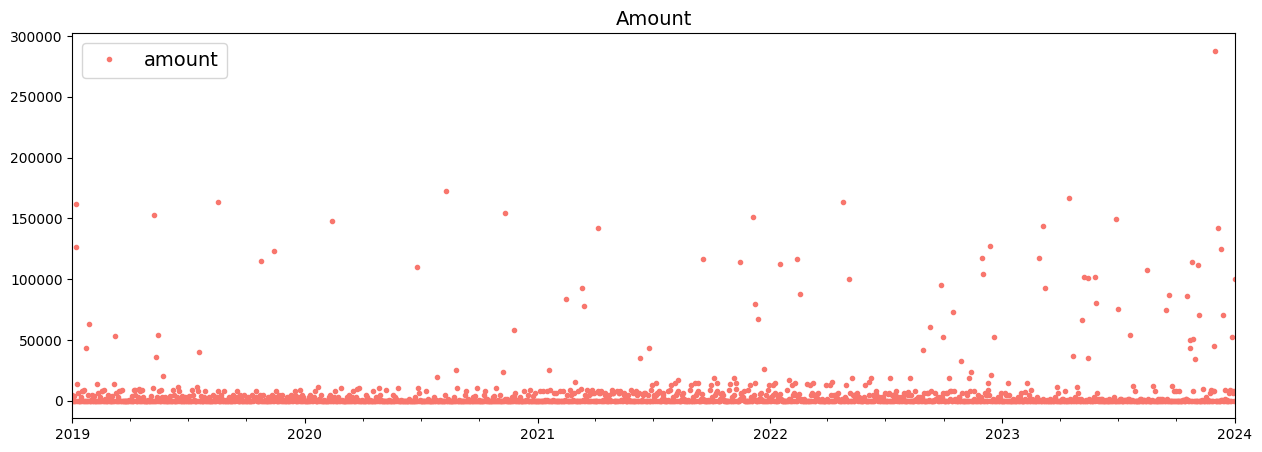

In [303]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

df_filtered.plot(style='.', figsize=(15,5), color=color_pal[0], title='Amount')

In [304]:
split_date = '2022-06-15'
df_train = df_filtered.loc[df_filtered.index <= split_date].copy()
df_test = df_filtered.loc[df_filtered.index > split_date].copy()

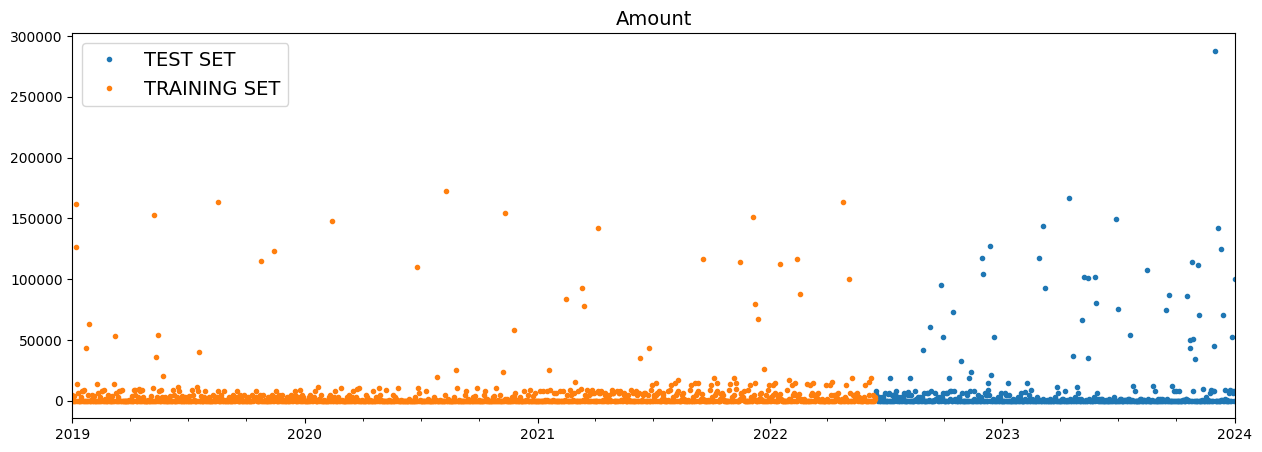

In [305]:
_ = df_test \
    .rename(columns={'amount': 'TEST SET'}) \
    .join(df_train.rename(columns={'amount': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Amount', style='.')

Create Time Series Features

In [265]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day

    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X

In [266]:
X_train, y_train = create_features(df_train, label='amount')
X_test, y_test = create_features(df_test, label='amount')

Create XGBoost Model

In [271]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

c:\Users\Sol\DesafioTripulaciones\env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

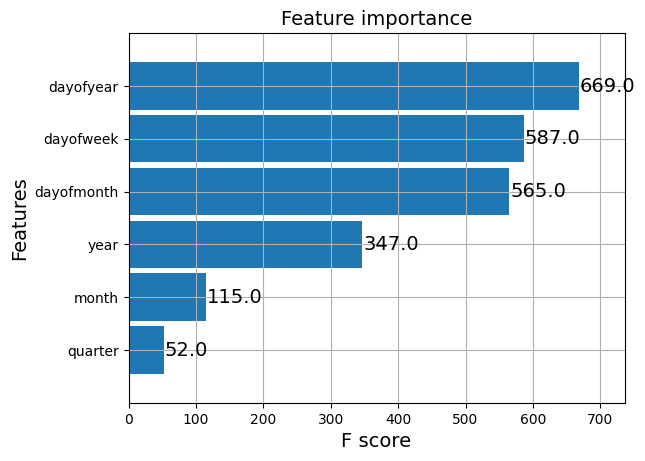

In [272]:
_ = plot_importance(reg, height=0.9)

In [273]:
df_test['Prediction'] = reg.predict(X_test)
df = pd.concat([df_test, df_train], sort=False)

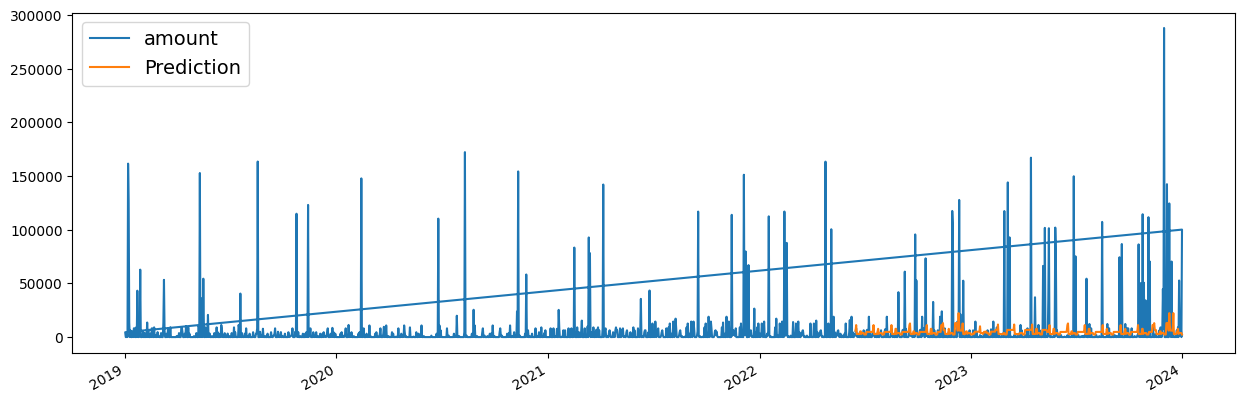

In [274]:
_ = df[['amount','Prediction']].plot(figsize=(15, 5))

Error Metrics On Test Set

In [282]:
mean_squared_error(y_true=df_test['amount'],
                   y_pred=df_test['Prediction'])

702326021.7034402

In [284]:
mean_absolute_error(y_true=df_test['amount'],
                   y_pred=df_test['Prediction'])

10018.662511061948

Fechas train : 2019-01-01 00:00:00 --- 2022-12-31 00:00:00  (n=1461)
Fechas test  : 2022-12-31 00:00:00 --- 2024-01-01 00:00:00  (n=367)


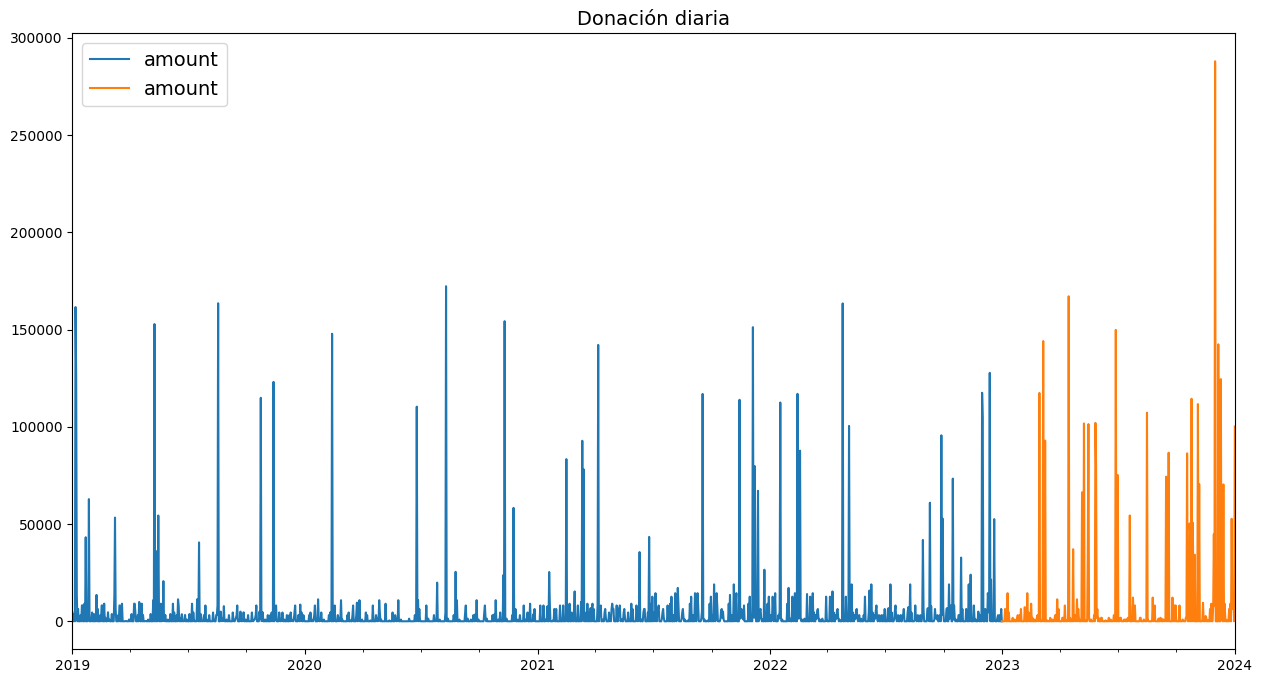

In [198]:
# Fechas Train-test
# ======================================================================================
fin_train = '2022-12-31'
print(f"Fechas train : {df_filtered.index.min()} --- {df_filtered.loc[:fin_train].index.max()}  (n={len(df_filtered.loc[:fin_train])})")
print(f"Fechas test  : {df_filtered.loc[fin_train:].index.min()} --- {df_filtered.loc[:].index.max()}  (n={len(df_filtered.loc[fin_train:])})")
df_filtered_train = df_filtered.loc[:fin_train]
df_filtered_test  = df_filtered.loc[fin_train:]

# Gráfico
# ======================================================================================
fig, ax=plt.subplots(figsize=(15, 8))
df_filtered_train.plot(ax=ax, label='train')
df_filtered_test.plot(ax=ax, label='test')
ax.set_title('Donación diaria')
ax.legend();

Test estacionariedad serie original
-------------------------------------
ADF Statistic: -17.228756304660934, p-value: 6.212224447435647e-30
KPSS Statistic: 1.2982209800698217, p-value: 0.01

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -13.645488224677853, p-value: 1.6226614681833963e-25
KPSS Statistic: 0.1327974198629808, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -16.74510459316084, p-value: 1.3482323222188512e-29
KPSS Statistic: 0.07655642664177069, p-value: 0.1

Test estacionariedad para serie diferenciada (order=3)
--------------------------------------------------
ADF Statistic: -19.591956593777926, p-value: 0.0
KPSS Statistic: 0.07655642664177069, p-value: 0.1

Test estacionariedad para serie diferenciada (order=4)
--------------------------------------------------
ADF Statistic: -22.31900943748853, p-value: 0.0


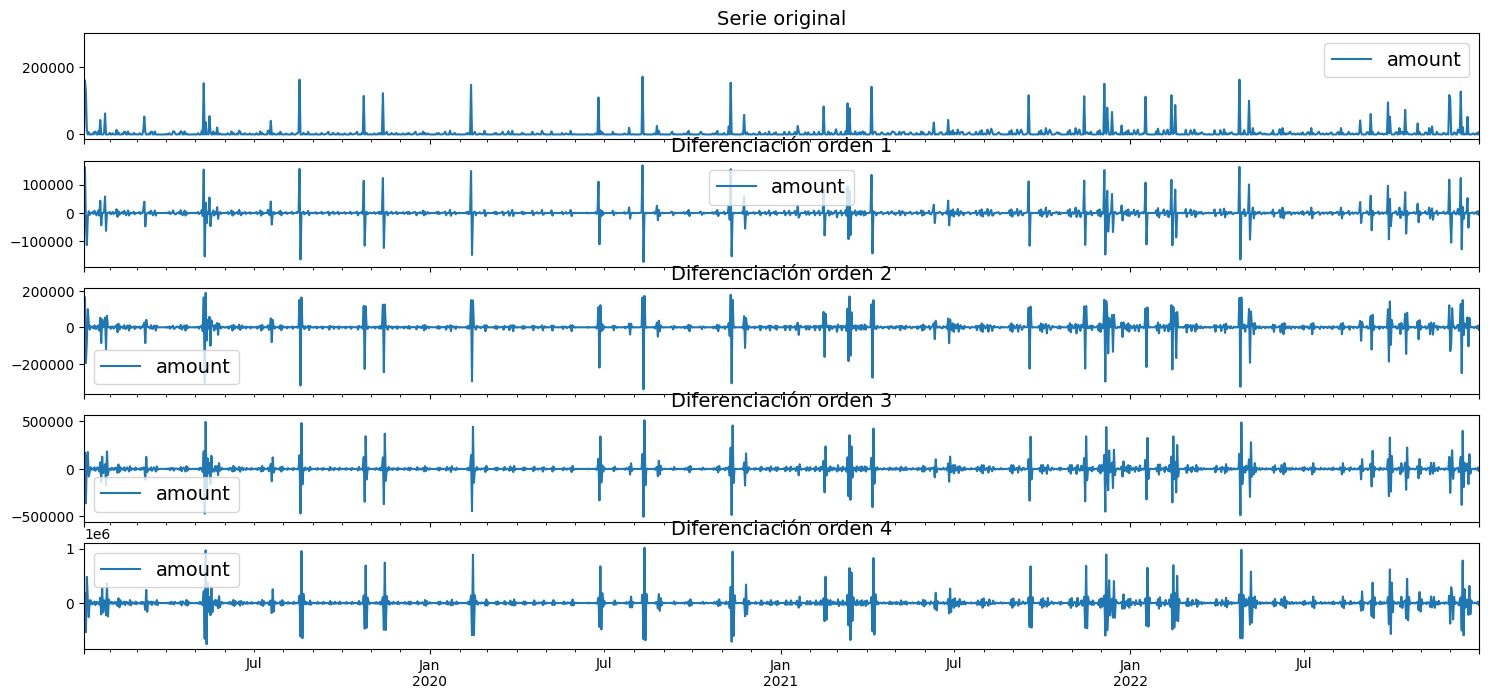

In [205]:
# Test estacionariedad
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

datos_diff_1 = df_filtered_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()
datos_diff_3 = datos_diff_2.diff().dropna()
datos_diff_4 = datos_diff_3.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(df_filtered)
kpss_result = kpss(df_filtered)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(df_filtered.diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(df_filtered.diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')


print('\nTest estacionariedad para serie diferenciada (order=3)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_3)
kpss_result = kpss(df_filtered.diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=4)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_4)
kpss_result = kpss(df_filtered.diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")

# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(18, 10), sharex=True)
df_filtered.plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2')
datos_diff_3.plot(ax=axs[3], title='Diferenciación orden 3')
datos_diff_4.plot(ax=axs[4], title='Diferenciación orden 4');

- La serie original NO es estacionaria según la prueba ADF, ya que el valor p (p-value) es significativamente menor que 0.05.
- Sin embargo, según la prueba KPSS, la serie original es estacionaria, ya que el valor p es menor que 0.05.

Esto puede ser un resultado contradictorio, pero es importante tener en cuenta que las pruebas ADF y KPSS evalúan diferentes aspectos de la estacionariedad:

- La prueba ADF evalúa si hay raíces unitarias en la serie, lo que indica la presencia de tendencia.
- La prueba KPSS evalúa si hay tendencia estacionaria en la serie.

El **p-value** obtenido tras la primera diferenciación es estadísticamente significativo acorde al umbral ampliamente reconocido y aceptado de **0.05**. Por lo tanto, la selección más adecuada para el parámetro **ARIMA** **d** es 0

## Función de autocorrelación (ACF)

La **ACF** calcula la correlación entre una serie temporal y sus valores retardados (lags). En el contexto de la modelización **ARIMA**, una caída brusca de la **ACF** después de unos pocos retardos indica que los datos tienen un orden autorregresivo finito. El retardo en el que cae la **ACF** proporciona una estimación del valor de **q**. Si el **ACF** muestra un patrón sinusoidal o sinusoidal amortiguado, sugiere la presencia de estacionalidad y requiere la consideración de órdenes estacionales además de órdenes no estacionales.

## Función de autocorrelación parcial (PACF)

La **PACF** mide la correlación entre un valor retardado (**lag**) y el valor actual de la serie temporal, teniendo en cuenta el efecto de los retardos intermedios. En el contexto de la modelización **ARIMA**, si la **PACF** se corta bruscamente después de un determinado retardo, mientras que los valores restantes están dentro del intervalo de confianza, sugiere un modelo AR de ese orden. El desfase en el que se corta el **PACF** da una idea del valor de **p**.

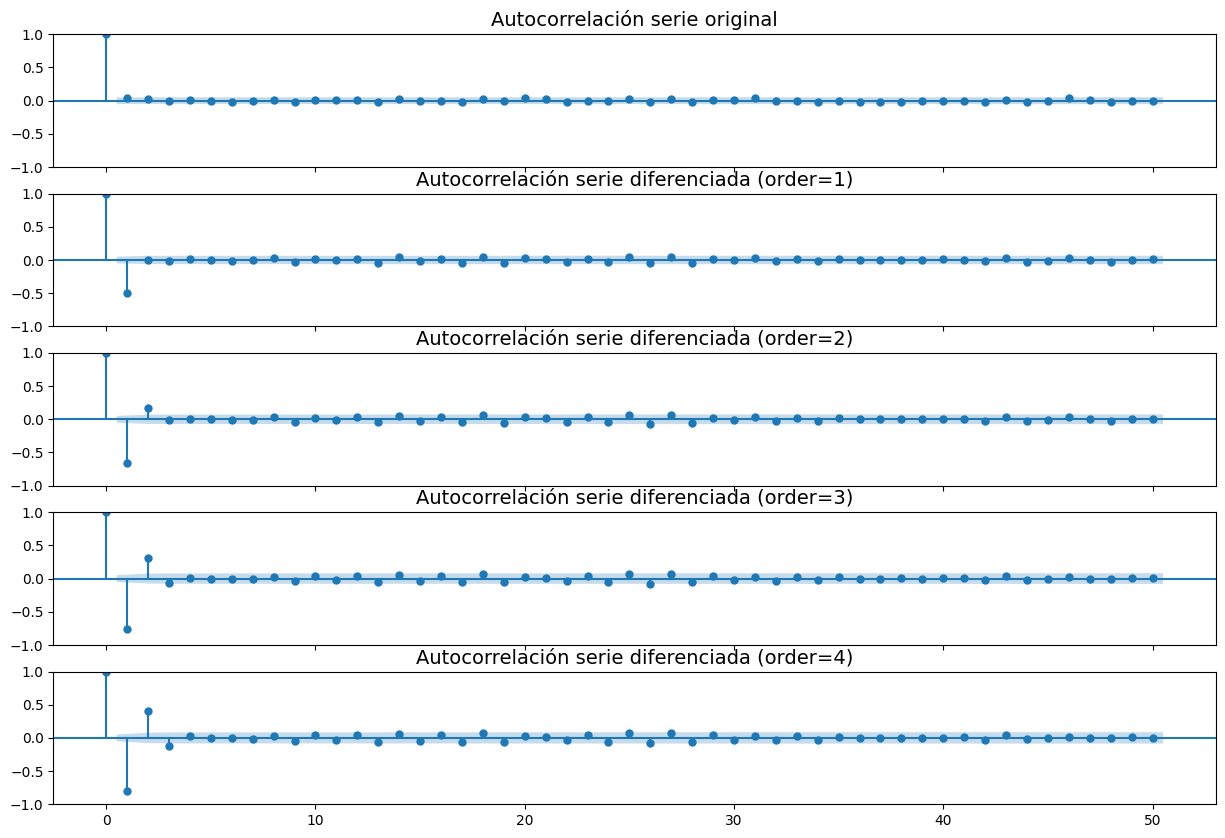

In [217]:
# Grafico de autocorrelación para la serie original y la serie diferenciada
# ==============================================================================
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 10), sharex=True)
plot_acf(df_filtered_train, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelación serie original')
plot_acf(datos_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autocorrelación serie diferenciada (order=1)')
plot_acf(datos_diff_2, ax=axs[2], lags=50, alpha=0.05)
axs[2].set_title('Autocorrelación serie diferenciada (order=2)')
plot_acf(datos_diff_3, ax=axs[3], lags=50, alpha=0.05)
axs[3].set_title('Autocorrelación serie diferenciada (order=3)')
plot_acf(datos_diff_4, ax=axs[4], lags=50, alpha=0.05)
axs[4].set_title('Autocorrelación serie diferenciada (order=4)');


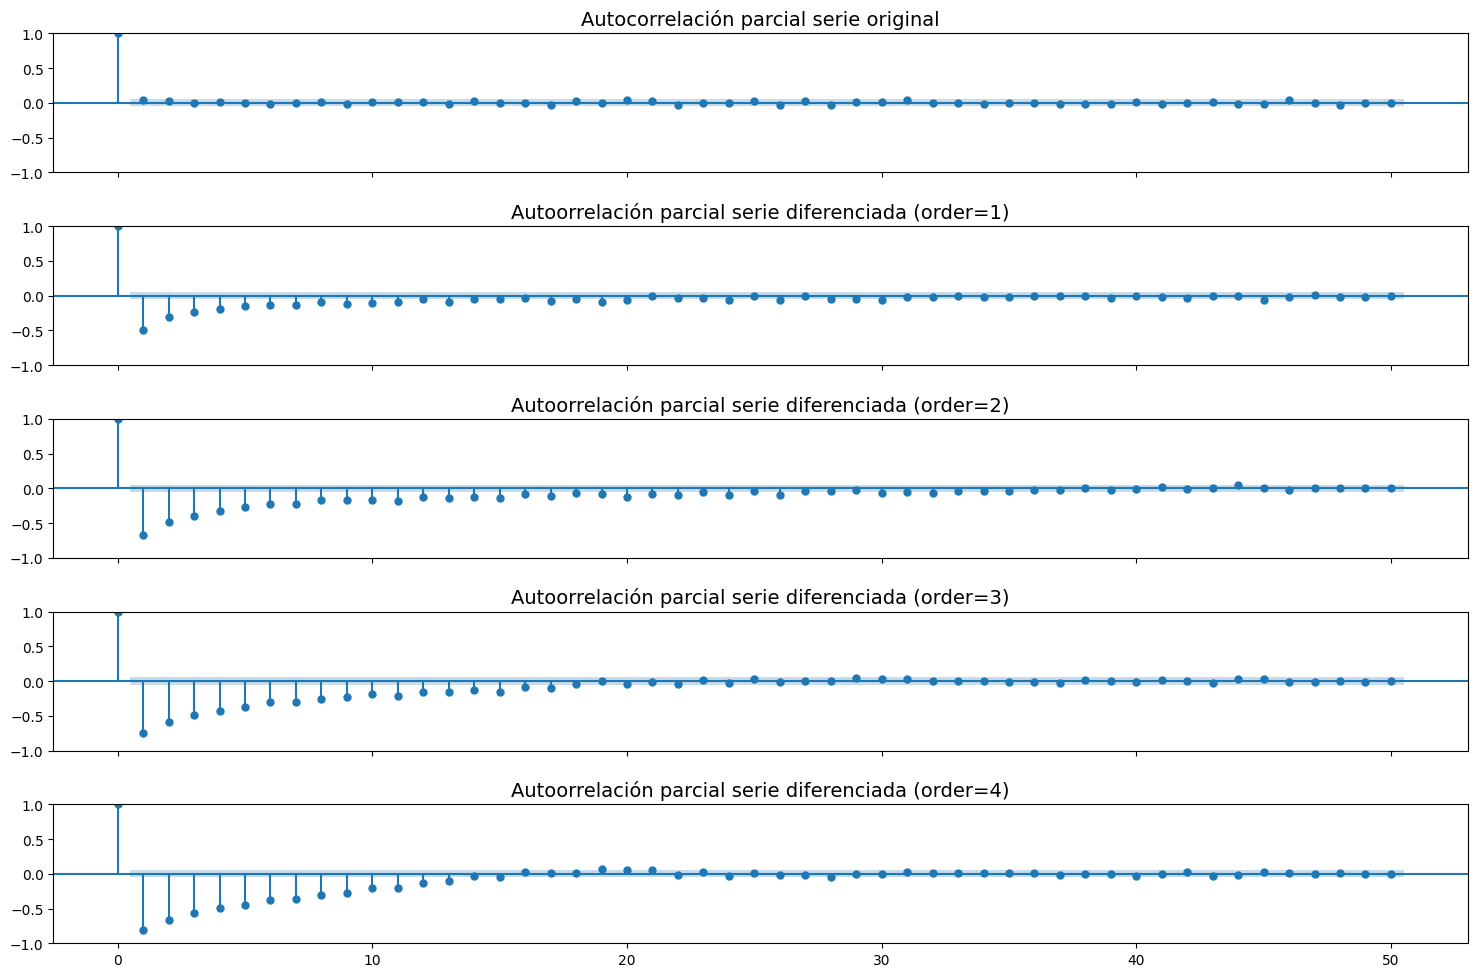

In [218]:
# Autocorrelación parcial para la serie original y la serie diferenciada
# ==============================================================================
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 10), sharex=True)
plot_pacf(df_filtered_train, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelación parcial serie original')
plot_pacf(datos_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autoorrelación parcial serie diferenciada (order=1)')
plot_pacf(datos_diff_2, ax=axs[2], lags=50, alpha=0.05)
axs[2].set_title('Autoorrelación parcial serie diferenciada (order=2)')
plot_pacf(datos_diff_3, ax=axs[3], lags=50, alpha=0.05)
axs[3].set_title('Autoorrelación parcial serie diferenciada (order=3)')
plot_pacf(datos_diff_4, ax=axs[4], lags=50, alpha=0.05)
axs[4].set_title('Autoorrelación parcial serie diferenciada (order=4)')
plt.tight_layout();

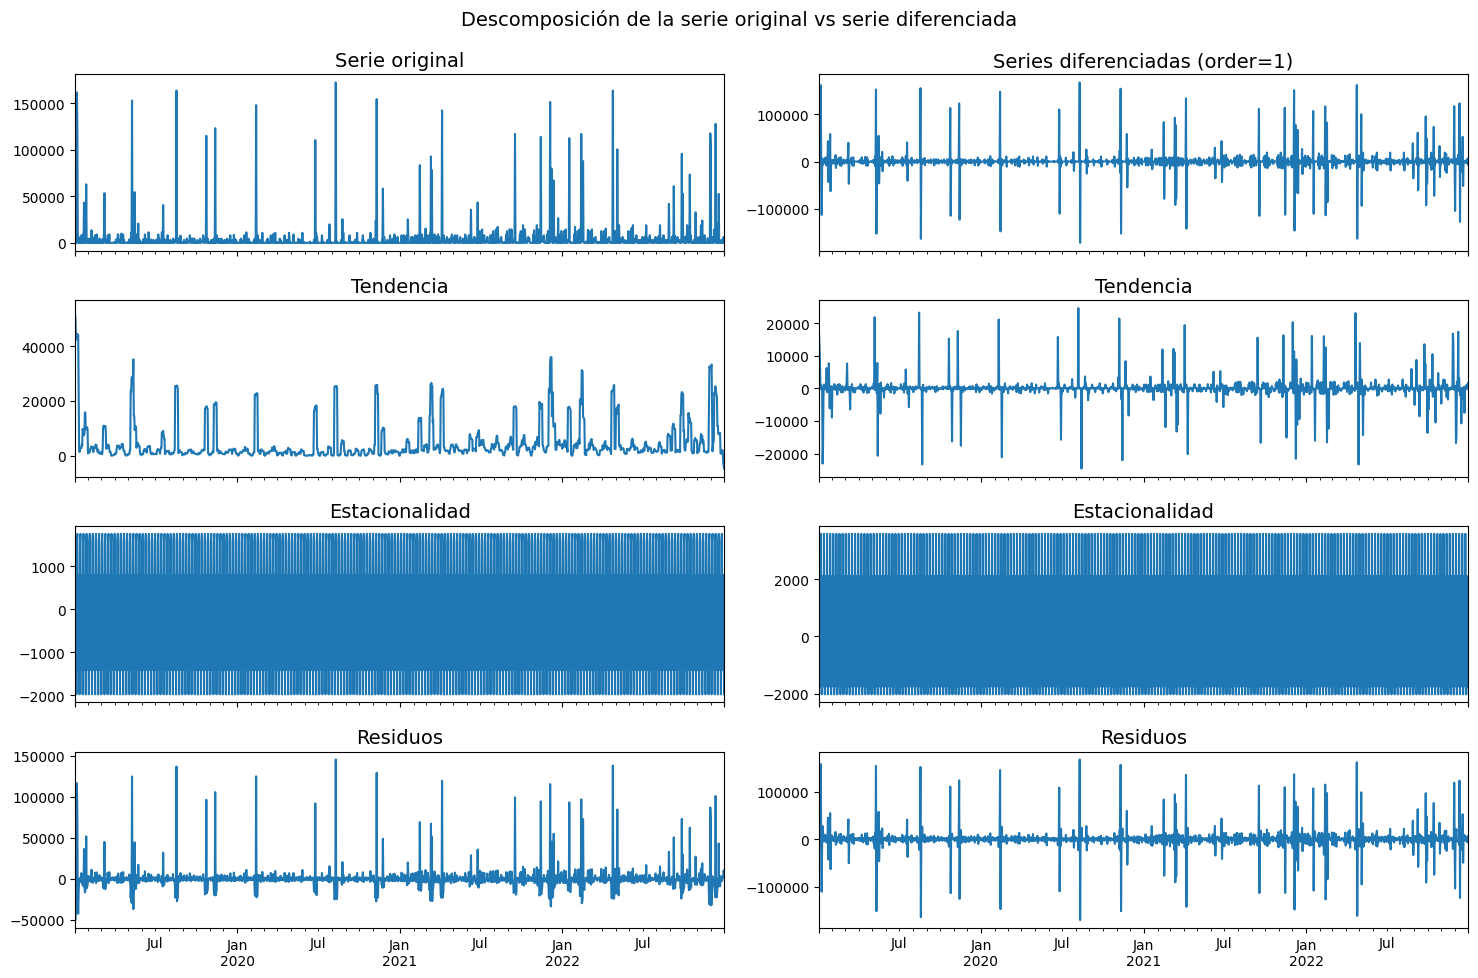

In [219]:
# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
res_decompose = seasonal_decompose(df_filtered_train, model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 10), sharex=True)
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original')
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia')
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad')
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos')
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order=1)')
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia')
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad')
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos')
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=14)
fig.tight_layout();

In [228]:
# Modelo SARIMAX con statsmodels.Sarimax
# ==============================================================================
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
modelo = SARIMAX(endog = df_filtered_train, order = (1, 2, 1), seasonal_order = (1, 1, 1, 2))
modelo_res = modelo.fit(disp=0)
warnings.filterwarnings("default")
modelo_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            amount   No. Observations:                 1461
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 2)   Log Likelihood              -17063.323
Date:                           Thu, 11 Apr 2024   AIC                          34136.646
Time:                                   16:26:22   BIC                          34163.067
Sample:                               01-01-2019   HQIC                         34146.503
                                    - 12-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6677      0.066    -10.123      0.000      -0.797      -0.538
ma.L1         -0.9919      0.071    -14.045      0.000      -1.130      -0.853
ar.S.L2       -0.4189      0.065     -6.480      0.000      -0.546      -0.292
ma.S.L2       -0.9902      0.059    -16.926      0.000      -1.105      -0.876
sigma2      1.893e+09   2.31e-11   8.21e+19      0.000    1.89e+09    1.89e+09
===================================================================================
Ljung-Box (L1) (Q):                  14.62   Jarque-Bera (JB):             52035.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             3.57
Prob(H) (two-sided):                  0.01   Kurtosis:                        31.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+35. Standard errors may be unstable.
"""

In [229]:
# Predicción
# ==============================================================================
predicciones_statsmodels = modelo_res.get_forecast(steps=len(df_filtered_train)).predicted_mean
predicciones_statsmodels.name = 'predicciones_statsmodels'
display(predicciones_statsmodels.head(4))

2023-01-01    3192.683006
2023-01-02     886.152598
2023-01-03    3591.508455
2023-01-04     801.941130
Freq: D, Name: predicciones_statsmodels, dtype: float64

In [230]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Suponiendo que 'y_true' son los valores observados y 'y_pred' son los valores predichos por tu modelo
rmse = np.sqrt(mean_squared_error(df_filtered_train, predicciones_statsmodels))
print("RMSE:", rmse)

RMSE: 170319.48033071996


In [224]:
df.describe()

,amount
count,909.000000
mean,11433.291232
std,28483.570151
min,0.000000
25%,903.590000
50%,3162.550000
75%,8132.270000
max,287980.000000


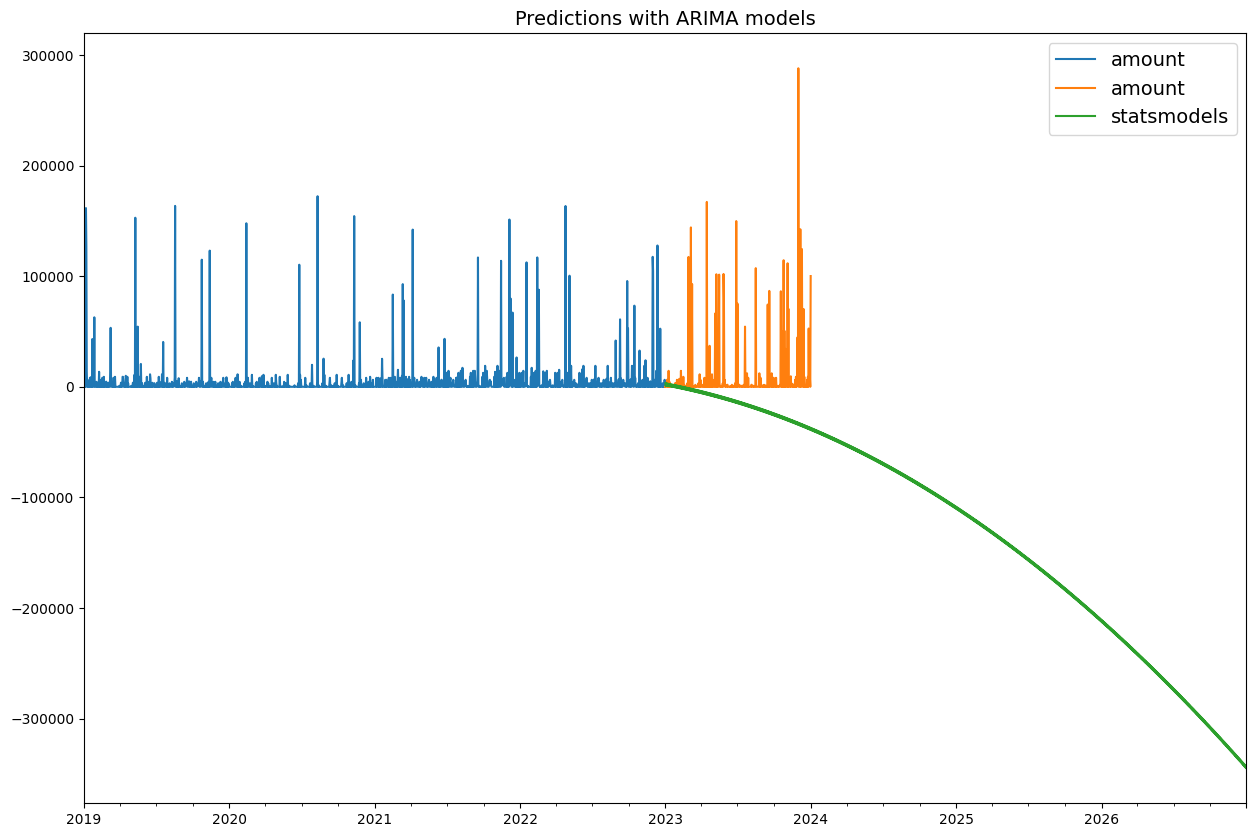

In [231]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 10))
df_filtered_train.plot(ax=ax, label='train')
df_filtered_test.plot(ax=ax, label='test')
predicciones_statsmodels.plot(ax=ax, label='statsmodels')
ax.set_title('Predictions with ARIMA models')
ax.legend();